# Title: Direct marketing optimization

Task: Maximize revenue from direct marketing campaigns.

Expected result:

 Which clients have higher propensity to buy consumer loan?

 Which clients have higher propensity to buy credit card?

 Which clients have higher propensity to buy mutual fund?

 Which clients are to be targeted with which offer? General description.

 What would be the expected revenue based on your strategy?

Importing neccessary  libraries for data manipulation and plot

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import functools as ft

Importing all data and merging then in one dataframe

In [4]:
df_demography = pd.read_excel(r"..\Dataset.xlsx", sheet_name="Soc_Dem")
df_actBalance = pd.read_excel(r"..\Dataset.xlsx", sheet_name="Products_ActBalance")
df_inout_flow = pd.read_excel(r"..\Dataset.xlsx", sheet_name="Inflow_Outflow")
df_target = pd.read_excel(r"..\Dataset.xlsx", sheet_name="Sales_Revenues")

df_merged = ft.reduce(lambda left, right: pd.merge(left, right, on='Client'), [df_demography, df_actBalance, df_inout_flow, df_target])

print("demographic data length " + str(df_demography.shape[0]))
print("act balance data length " + str(df_actBalance.shape[0]))
print("inout flow data length " + str(df_inout_flow.shape[0]))
print("target data length " + str(df_target.shape[0]))

demographic data length 1615
act balance data length 1615
inout flow data length 1587
target data length 969


Cheking colmns in merged dataframe and checking for null values in each column

In [ ]:
print(df_merged.columns)
print(df_merged.isna().sum())

Handling missing values:
- for all account balance fields and count of account, 0 be imputed. No record=>0
- for Sex field, 2 records are missing, and I have choose to drop these rows as it is very small number.


In [5]:
df_merged = df_merged[df_merged['Sex'].notna()]
df_merged= df_merged.fillna(0) #this will fill all remaining null values with 0
df_merged.shape

(949, 36)

Getting description of the columns in the dataframe: targeting the data type

In [ ]:
df_merged.info() #to get the information of merged data frame: number of null values and data types of fields

Statistics of fields in the merged dataframe and the observation

1. Minimum age is 0 in this data set. And I found minumum age to obtain bank account in Belgium is 18 and kids account from 10 years old (from the internet)
   So, I will assume this error as missing value and imputed with mean age value
2. The discription shows, max values in some fields are far more than 3rd quartile value and minimum way less than 1st quartile. Aassuming all records are correct, I will not    
   remove outliers. In my opinion, they also could contain important information in this particular case. 
   This is also shown in the box diagram below.

In [6]:
df_merged.describe() 

,Client,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,815.430980,42.928346,100.305585,1.076923,0.328767,0.997893,0.264489,0.115911,0.092729,2501.271078,...,13.807165,2.022129,5.360379,4.620653,0.203372,0.249737,0.303477,1.965585,2.742972,3.643327
std,465.853489,18.647834,65.690566,0.327026,0.582285,4.589705,0.441293,0.320288,0.321258,6291.004325,...,13.012640,2.711620,8.384657,5.237547,0.402719,0.433089,0.460002,10.043971,17.874145,7.782232
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,29.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.135000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,815.000000,41.000000,94.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,536.951429,...,11.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1220.000000,58.000000,151.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2278.614643,...,19.000000,3.000000,7.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.852143
max,1615.000000,90.000000,271.000000,4.000000,3.000000,79.000000,1.000000,1.000000,2.000000,74934.956071,...,83.000000,25.000000,60.000000,34.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


Change ages less than 18 by mean age value

In [7]:
df_merged.loc[df_merged["Age"] < 18, "Age"] = df_merged['Age'].mean()
df_merged.shape

(949, 36)

Box plot to see how data in each column are distributed and to check for outliers

In [42]:
cols_dem = ['Age', 'Tenure']
cols_accbal = ['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL']
cols_credt = ['VolumeCred', 'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA']
cols_transct_debt = ['TransactionsDeb',	'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']
cols_volm_credt = ['VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card','VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder']
cols_volm_revenue = ['Revenue_MF','Revenue_CC','Revenue_CL']

def boxplt(list_columns, wdth=14):
    fig, axes = plt.subplots(ncols=len(list_columns))
    for column, axis in zip(list_columns, axes):
            sns.boxplot(data=df_merged[column], ax=axis) 
            axis.set_title(column)
            # axis.set(xticklabels=[], xticks=[], ylabel=column)

    fig.set_figheight(4)
    fig.set_figwidth(wdth)
    plt.tight_layout()
    plt.show()

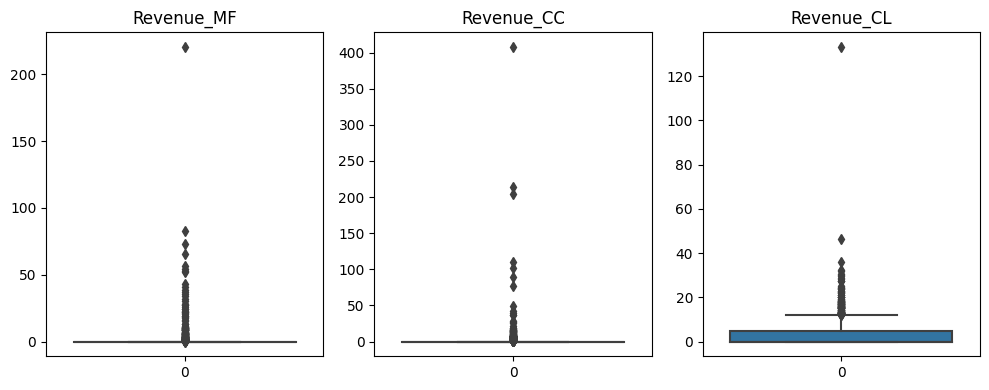

In [43]:
boxplt(cols_volm_revenue, 10)

In [1]:
boxplt(cols_dem, 7)

NameError: name 'boxplt' is not defined

In [ ]:
boxplt(cols_credt)


In [ ]:
boxplt(cols_accbal)

In [ ]:
boxplt(cols_transct_debt)

In [ ]:
boxplt(cols_volm_credt)

Learning the correlation between fields with numeric value (not client id)

From the heatmap plot we can see there are fields that are highly correlated: either one to be removed as a redundent information or combine the fields.

volumeCredit&VolumeCredit_CA, VolumeDeb&volumeDeb_CA, TransactionsCred&TransactionsCred_CA, TransactionsDebt&TransactionsDebt_CA, VolumeDeb&volumCred, volumeDeb_CA&Volume_Cred ...


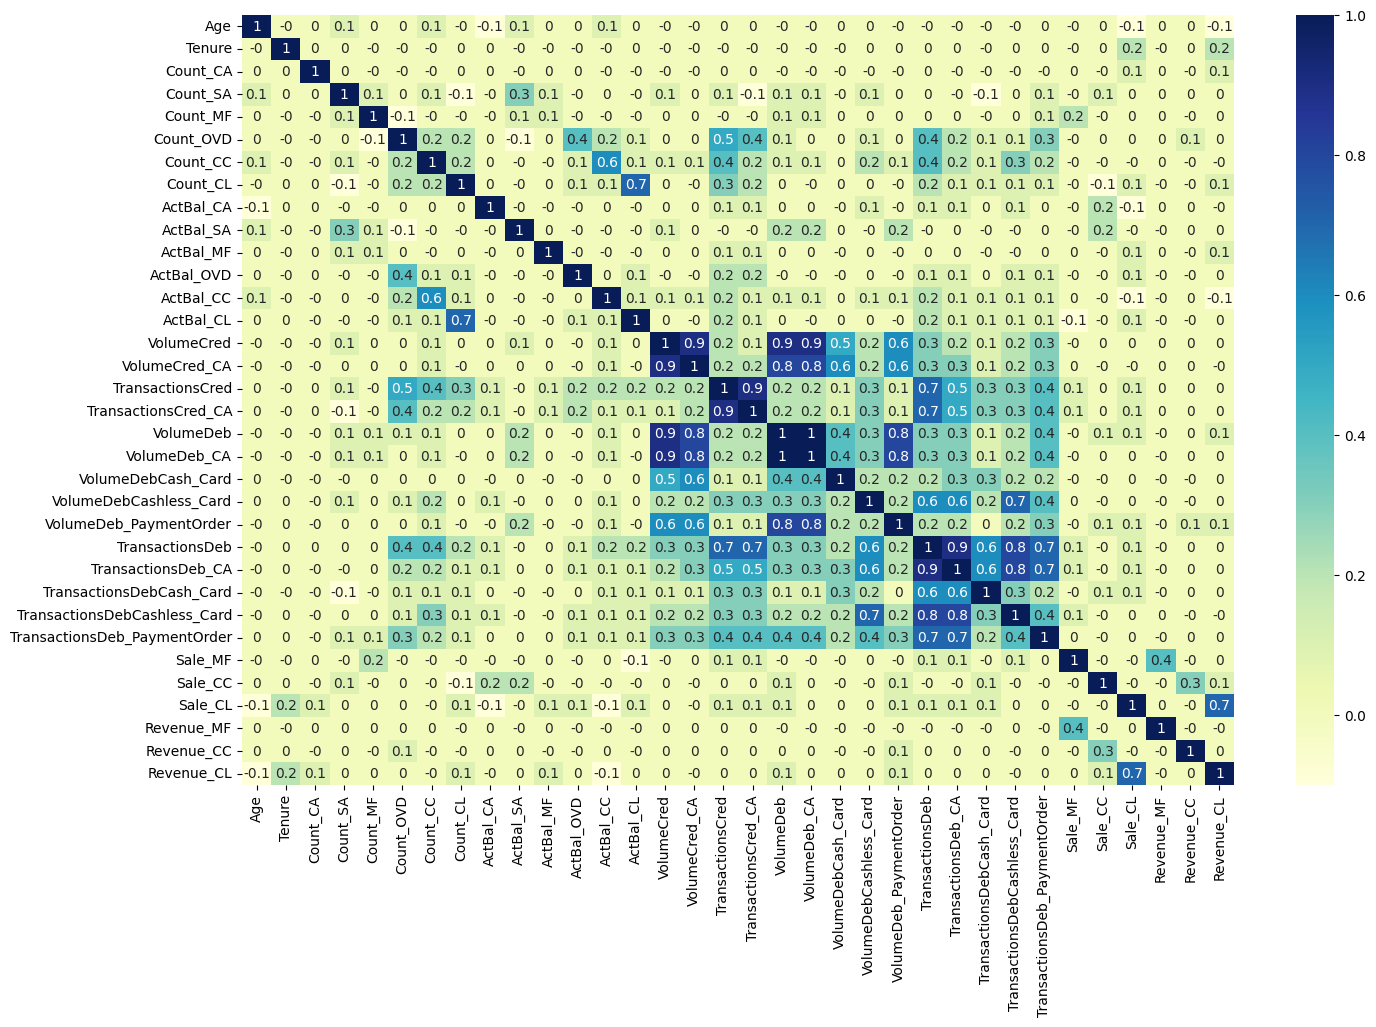

In [9]:
df_selected_numeric = df_merged.drop(['Client', 'Sex'], axis=1)
fig = plt.figure(figsize=(16, 10))
crr = df_selected_numeric.corr()
sns.heatmap(round(crr, 1), cmap="YlGnBu", annot=True)
plt.show()

Machine learning models: importing libraries

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics as mt

scaler = StandardScaler()

Feature selection for models. Models trained and performance is checked on different feature selection: first all requered features and then with new features created 
by combining highly correlated features.

In [11]:

X_all =  df_merged.iloc[:,:-6]  #all features
X_all.drop(['Client'], axis=1, inplace=True) #remove client id from the feature

''' 
Feature selection for Credit Loan model: Remove all information of Credit loan => that is the information we want to know.
'''
X_CL = X_all.drop(['Count_CL' , 'ActBal_CL'], axis=1)

#combining features with high correlation(volumeCred&VolumeCred_CA, VolumeDeb&VolumeDeb_CA, TransactionCred&TransactionCred_CA, TransactionDeb&TransactionDeb_CA)
X_CL['VolumeCred2'] = X_CL['VolumeCred'] + X_CL['VolumeCred_CA']
X_CL['VolumeDeb2'] = X_CL['VolumeDeb'] + X_CL['VolumeDeb_CA']
X_CL['TransactionsCred2'] = X_CL['TransactionsCred'] + X_CL['TransactionsCred_CA']
X_CL['TransactionsDeb2'] = X_CL['TransactionsDeb'] + X_CL['TransactionsDeb_CA']
X_CL.drop(['VolumeCred', 'VolumeCred_CA','VolumeDeb', 'VolumeDeb_CA', 'TransactionsCred', 'TransactionsCred_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of credit loan features
'''

''' 
Feature selection for Credit Card model: Remove all information of Credit card
'''
X_CC = X_all.drop(['Count_CC' , 'ActBal_CC', 'ActBal_CC' , 'VolumeCred' , 'TransactionsCred'], axis=1)


#combining features
X_CC['VolumeDeb2'] = X_CC['VolumeDeb'] + X_CC['VolumeDeb_CA']
X_CC['TransactionsDeb2'] = X_CC['TransactionsDeb'] + X_CC['TransactionsDeb_CA']
X_CC.drop(['VolumeDeb', 'VolumeDeb_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of credit card featuresa
'''

''' 
Feature selection for mutual fund model: Remove all information of mutual fund
'''
X_MF = X_all.drop(['Count_MF' , 'ActBal_MF'], axis=1)

# #combining features
X_MF['VolumeCred2'] = X_MF['VolumeCred'] + X_MF['VolumeCred_CA']
X_MF['VolumeDeb2'] = X_MF['VolumeDeb'] + X_MF['VolumeDeb_CA']
X_MF['TransactionsCred2'] = X_MF['TransactionsCred'] + X_MF['TransactionsCred_CA']
X_MF['TransactionsDeb2'] = X_MF['TransactionsDeb'] + X_MF['TransactionsDeb_CA']
X_MF.drop(['VolumeCred', 'VolumeCred_CA','VolumeDeb', 'VolumeDeb_CA', 'TransactionsCred', 'TransactionsCred_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of mutual fund features
'''


'End of mutual fund features\n'

Setting target variable for our sale classification model and check for class balance.

As shown in the bar graph the classes in the target variable are not balanced and I am going to use SMOT to balance.

<AxesSubplot: xlabel='Sale_MF', ylabel='count'>

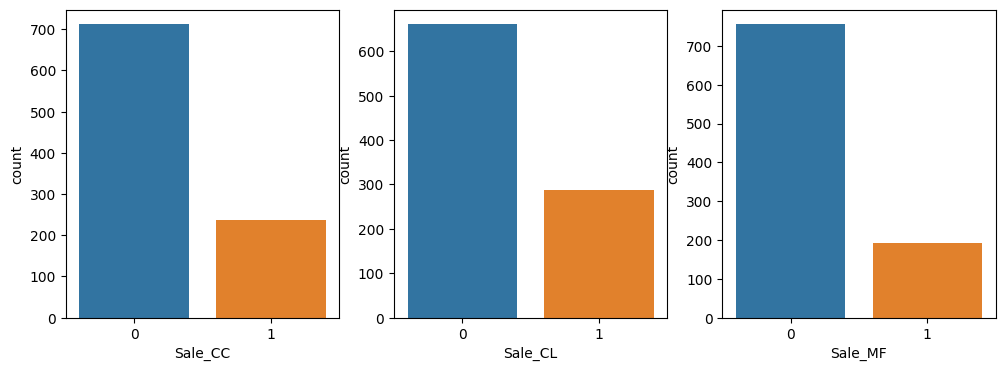

In [12]:
#Target variables(sales) for our 3 models

y_cc = df_merged['Sale_CC'] 
y_cl = df_merged['Sale_CL'] 
y_mf = df_merged['Sale_MF'] 

#Target values are not balanced and I am going to do both up and down sampling
fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.countplot(x=y_cc, ax=axes[0])
sns.countplot(x=y_cl, ax=axes[1])
sns.countplot(x=y_mf, ax=axes[2])


Encoding categorical feature(Sex) with onehotencoder

In [13]:
def get_ohe(df, encoder):
    temp_df = pd.DataFrame(data=encoder.transform(df[['Sex']]), columns=encoder.get_feature_names_out())
    df.drop(columns=['Sex'], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df



ohe1 = OneHotEncoder(sparse_output=False)
ohe1.fit(X_CC[['Sex']])

ohe2 = OneHotEncoder(sparse_output=False)
ohe2.fit(X_CL[['Sex']])

ohe3 = OneHotEncoder(sparse_output=False)
ohe3.fit(X_MF[['Sex']])

X_CC = get_ohe(X_CC, ohe1)
X_CL = get_ohe(X_CL, ohe2)
X_MF = get_ohe(X_MF, ohe3)

Scaling numberical features.

In [14]:
numeric_features_cc = X_CC.loc[:, X_CC.columns != 'Sex']
numeric_features_cl = X_CL.loc[:, X_CL.columns != 'Sex']
numeric_features_mf = X_MF.loc[:, X_MF.columns != 'Sex']

X_CC_t = X_CC.copy()
X_CL_t = X_CL.copy()
X_MF_t = X_MF.copy()

X_CC_t[numeric_features_cc.columns] = scaler.fit_transform(X_CC_t[numeric_features_cc.columns])
X_CL_t[numeric_features_cl.columns] = scaler.fit_transform(X_CL_t[numeric_features_cl.columns])
X_MF_t[numeric_features_mf.columns] = scaler.fit_transform(X_MF_t[numeric_features_mf.columns])

Resampling target values. I have used up sampling because it is better to contact client and he/she says no than not contacting potential client who is wiling to buy a product.

In [15]:
smote = SMOTE() 
X_CC_balnced, y_cc_balanced = smote.fit_resample(X_CC_t, y_cc)
X_CL_balnced, y_cl_balanced = smote.fit_resample(X_CL_t, y_cl)
X_MF_balnced, y_mf_balanced = smote.fit_resample(X_MF_t, y_mf)

split train test data for training and testing the models

In [16]:
X_CC_train, X_CC_test, y_cc_train, y_cc_test = train_test_split(X_CC_balnced, y_cc_balanced, test_size=0.15)
X_CL_train, X_CL_test, y_cl_train, y_cl_test = train_test_split(X_CL_balnced, y_cl_balanced, test_size=0.15)
X_MF_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_MF_balnced, y_mf_balanced, test_size=0.15)

Create a random forest classifier model for credit card, train and test the model and finally it will print the classification report

In [17]:

rmf_classifier1 = RandomForestClassifier(n_estimators=30, random_state=42)
rmf_classifier1.fit(X_CC_train, y_cc_train) #train model
predicted_values_cc = rmf_classifier1.predict(X_CC_test)
score_cc = mt.classification_report(y_cc_test, predicted_values_cc)
print(score_cc)



              precision    recall  f1-score   support

           0       0.82      0.85      0.83       112
           1       0.83      0.79      0.81       102

    accuracy                           0.82       214
   macro avg       0.82      0.82      0.82       214
weighted avg       0.82      0.82      0.82       214



RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=10,
                       n_estimators=30)


Create a random forest classifier model for consumer loan, train and test the model and finally it will print the classification report

In [18]:
rmf_classifier2 = RandomForestClassifier(n_estimators=30, random_state=42)
rmf_classifier2.fit(X_CL_train, y_cl_train) #train model
predicted_values_cl = rmf_classifier2.predict(X_CL_test)
score_cl = mt.classification_report(y_cl_test, predicted_values_cl)
print(score_cl)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        97
           1       0.88      0.75      0.81       102

    accuracy                           0.82       199
   macro avg       0.83      0.82      0.82       199
weighted avg       0.83      0.82      0.82       199



Comparison of classification results 


classification report before highly correlated features are combined

               precision    recall  f1-score   support

            0       0.68      0.94      0.79        94
            1       0.54      0.14      0.23        49

     accuracy                           0.66       143
    macro avg       0.61      0.54      0.51       143
 weighted avg       0.63      0.66      0.59       143


Classification report after highly correlated features are combined

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       104
           1       0.50      0.26      0.34        39

    accuracy                           0.73       143
   macro avg       0.63      0.58      0.58       143
weighted avg       0.69      0.73      0.69       143


Classification report after resampling the data (Best reslt)

                 precision    recall  f1-score   support

           0       0.71      0.88      0.79        85
           1       0.89      0.73      0.80       114

    accuracy                           0.79       199
   macro avg       0.80      0.81      0.79       199
weighted avg       0.81      0.79      0.79       199


Classification report after parameter tuning 

                precision    recall  f1-score   support

           0       0.58      0.78      0.67        85
           1       0.78      0.59      0.67       114

    accuracy                           0.67       199
   macro avg       0.68      0.68      0.67       199
weighted avg       0.70      0.67      0.67       199


Create a random forest classifier model for mutual fund, train and test the model and finally it will print the classification report

In [19]:
rmf_classifier3 = RandomForestClassifier(n_estimators=30, random_state=42)
rmf_classifier3.fit(X_MF_train, y_mf_train) #train model
predicted_values_mf = rmf_classifier3.predict(X_mf_test)
score_mf = mt.classification_report(y_mf_test, predicted_values_mf)
print(score_mf)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.91      0.85      0.88       120

    accuracy                           0.88       227
   macro avg       0.88      0.88      0.88       227
weighted avg       0.88      0.88      0.88       227



Hyper arameter tuning: Automating the selection of best parametes for the model, in this case for credit loan sale model(it is just to try on one model)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [30, 60, 90, 120],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 5, 10],
    'max_leaf_nodes': [5, 7, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_CL_train, y_cl_train)
print(grid_search.best_estimator_)

Which features are affecting most for models of credict card, credit loan and mutual fund?

In [20]:
def plot_featureImportance(features_df, model, sale):
    features = features_df.columns
    featr_importance = model.feature_importances_
    indices = np.argsort(featr_importance)

    plt.title(f'Feature Importances for {sale} classification model')
    plt.barh(range(len(indices)), featr_importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

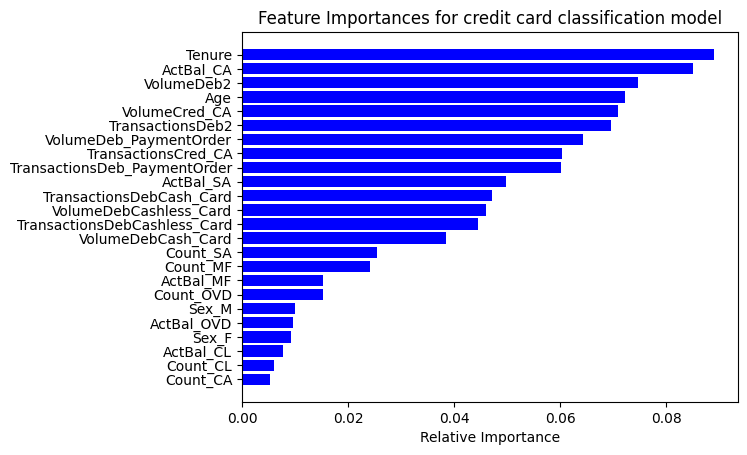

In [21]:
plot_featureImportance(X_CC, rmf_classifier1, 'credit card')

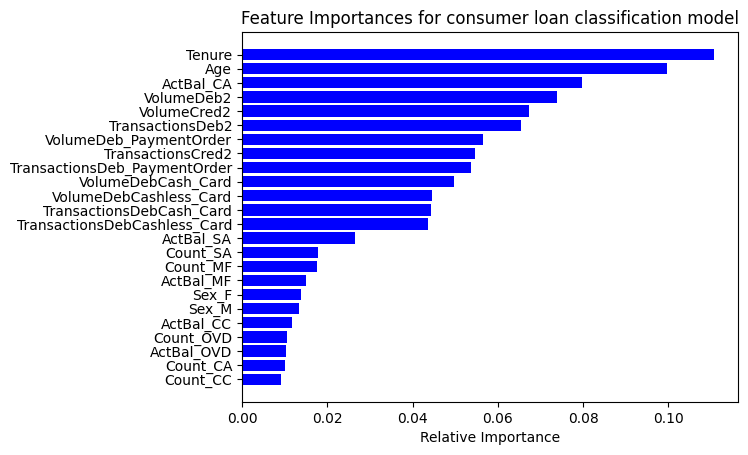

In [22]:
plot_featureImportance(X_CL, rmf_classifier2, 'consumer loan')

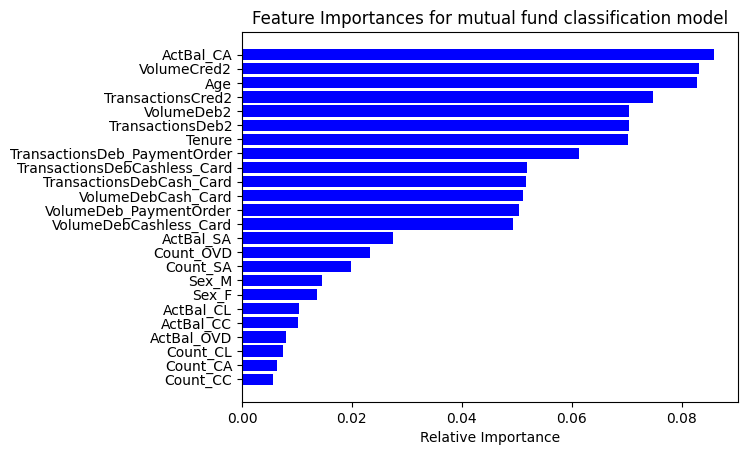

In [23]:
plot_featureImportance(X_MF, rmf_classifier3, 'mutual fund')

Revenue prediction

Selecting records that different from 0

In [24]:
df_revenueCC = df_merged.loc[df_merged['Revenue_CC'] != 0]
df_revenueCL = df_merged.loc[df_merged['Revenue_CL'] != 0]
df_revenueMF = df_merged.loc[df_merged['Revenue_MF'] != 0]

Selecting features 

In [45]:

''' 
Feature selection for Credit Loan model: Remove all information of Credit loan => that is the information we want to know.
'''
X_all1 =  df_revenueCL.iloc[:,:-6]  #all features
X_all1.drop(['Client'], axis=1,inplace=True) #remove client id from the feature
X_CL_R = X_all1.drop(['Count_CL' , 'ActBal_CL'], axis=1)
X_CL_R['Sale_CL'] = df_revenueCL['Sale_CL']

#combining features with high correlation(volumeCred&VolumeCred_CA, VolumeDeb&VolumeDeb_CA, TransactionCred&TransactionCred_CA, TransactionDeb&TransactionDeb_CA)
X_CL_R['VolumeCred2'] = X_CL_R['VolumeCred'] + X_CL_R['VolumeCred_CA']
X_CL_R['VolumeDeb2'] = X_CL_R['VolumeDeb'] + X_CL_R['VolumeDeb_CA']
X_CL_R['TransactionsCred2'] = X_CL_R['TransactionsCred'] + X_CL_R['TransactionsCred_CA']
X_CL_R['TransactionsDeb2'] = X_CL_R['TransactionsDeb'] + X_CL_R['TransactionsDeb_CA']
X_CL_R.drop(['VolumeCred', 'VolumeCred_CA','VolumeDeb', 'VolumeDeb_CA', 'TransactionsCred', 'TransactionsCred_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of credit loan features
'''

''' 
Feature selection for Credit Card model: Remove all information of Credit card
'''
X_all2 =  df_revenueCC.iloc[:,:-6]  #all features
X_all2.drop(['Client'], axis=1,inplace=True) #remove client id from the feature
X_CC_R = X_all2.drop(['Count_CC' , 'ActBal_CC', 'ActBal_CC' , 'VolumeCred' , 'TransactionsCred'], axis=1)
X_CC_R['Sale_CC'] = df_revenueCC['Sale_CC']


#combining features
X_CC_R['VolumeDeb2'] = X_CC_R['VolumeDeb'] + X_CC_R['VolumeDeb_CA']
X_CC_R['TransactionsDeb2'] = X_CC_R['TransactionsDeb'] + X_CC_R['TransactionsDeb_CA']
X_CC_R.drop(['VolumeDeb', 'VolumeDeb_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of credit card features
'''

''' 
Feature selection for mutual fund model: Remove all information of mutual fund
'''
X_all3 =  df_revenueMF.iloc[:,:-6]  #all features
X_all3.drop(['Client'], axis=1,inplace=True) #remove client id from the feature
X_MF_R = X_all3.drop(['Count_MF' , 'ActBal_MF'], axis=1)
X_MF_R['Sale_MF'] = df_revenueMF['Sale_MF']
# #combining features
X_MF_R['VolumeCred2'] = X_MF_R['VolumeCred'] + X_MF_R['VolumeCred_CA']
X_MF_R['VolumeDeb2'] = X_MF_R['VolumeDeb'] + X_MF_R['VolumeDeb_CA']
X_MF_R['TransactionsCred2'] = X_MF_R['TransactionsCred'] + X_MF_R['TransactionsCred_CA']
X_MF_R['TransactionsDeb2'] = X_MF_R['TransactionsDeb'] + X_MF_R['TransactionsDeb_CA']
X_MF_R.drop(['VolumeCred', 'VolumeCred_CA','VolumeDeb', 'VolumeDeb_CA', 'TransactionsCred', 'TransactionsCred_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End
'''


'End\n'

In [46]:
#Target variables(Revenue) for our 3 models

y_cc_R = df_revenueCC['Revenue_CC'] 
y_cl_R = df_revenueCL['Revenue_CL'] 
y_mf_R = df_revenueMF['Revenue_MF'] 

Encoding charaters with one hot encoder

In [47]:
ohe1 = OneHotEncoder(sparse_output=False)
ohe1.fit(X_CC_R[['Sex']])

ohe2 = OneHotEncoder(sparse_output=False)
ohe2.fit(X_CL_R[['Sex']])

ohe3 = OneHotEncoder(sparse_output=False)
ohe3.fit(X_MF_R[['Sex']])


X_CC_R = get_ohe(X_CC_R, ohe1)
X_CL_R = get_ohe(X_CL_R, ohe2)
X_MF_R = get_ohe(X_MF_R, ohe3)



Scaling numberic features.

In [48]:
numeric_features_cc_r = X_CC_R.loc[:, X_CC_R.columns != 'Sex']
numeric_features_cl_r = X_CL_R.loc[:, X_CL_R.columns != 'Sex']
numeric_features_mf_r = X_MF_R.loc[:, X_MF_R.columns != 'Sex']

X_CC_t_R = X_CC_R.copy()
X_CL_t_R = X_CL_R.copy()
X_MF_t_R = X_MF_R.copy()

X_CC_t_R[numeric_features_cc_r.columns] = scaler.fit_transform(X_CC_t_R[numeric_features_cc_r.columns])
X_CL_t_R[numeric_features_cl_r.columns] = scaler.fit_transform(X_CL_t_R[numeric_features_cl_r.columns])
X_MF_t_R[numeric_features_mf_r.columns] = scaler.fit_transform(X_MF_t_R[numeric_features_mf_r.columns])


Split data into train and test data sets

In [49]:
X_CC_train_r, X_CC_test_r, y_cc_train_r, y_cc_test_r = train_test_split(X_CC_t_R, y_cc_R, test_size=0.15)
X_CL_train_r, X_CL_test_r, y_cl_train_r, y_cl_test_r = train_test_split(X_CL_t_R, y_cl_R, test_size=0.15)
X_MF_train_r, X_mf_test_r, y_mf_train_r, y_mf_test_r = train_test_split(X_MF_t_R, y_mf_R, test_size=0.15)

Initializae regression models

In [50]:
rfRegressor_cc = RandomForestRegressor(n_estimators=120, random_state=42) #instantiate regresion model of random forest
rfRegressor_cl = RandomForestRegressor(n_estimators=120, random_state=42) #instantiate regresion model of random forest
rfRegressor_mf = RandomForestRegressor(n_estimators=120, random_state=42) #instantiate regresion model of random forest

Train, predict and get the score of the model for mutual fund, R2 metrics

In [51]:
rfRegressor_mf.fit(X_MF_train_r, y_mf_train_r) #train the model
predicted_revenueMF = rfRegressor_mf.predict(X_mf_test_r) #predict revenue using test set
score_reenueMF= mt.r2_score(y_mf_test_r, predicted_revenueMF) #calculate r2 score to see how model is performing
score_reenueMF


-0.08498009088831715

Train, predict and get the score of the model for credit card, R2 metrics

In [34]:

rfRegressor_cc.fit( X_CC_train_r, y_cc_train_r)

predicted_revenueCC = rfRegressor_cc.predict(X_CC_test_r) 
score_revenueCC= mt.r2_score(y_cc_test_r, predicted_revenueCC) 
score_revenueCC


-4.261328819120002

Train, predict and get the score of the model for consumer loan, R2 metrics

In [33]:
rfRegressor_cl.fit(X_CL_train_r, y_cl_train_r)
predicted_revenueCL = rfRegressor_cl.predict(X_CL_test_r) 
score_reenueCL= mt.r2_score(y_cl_test_r, predicted_revenueCL) 
score_reenueCL


-0.3644140740867501

Results

To answer the questions first I will take records of clients who don't have Sales_Revenue data, which is around 40% of the total data.
The following code cell get the remaining data and preprocess it same way I have preprocessed the data to create the models.

In [35]:

df_NoTarget = ft.reduce(lambda left, right: pd.merge(left, right, on='Client'), [df_demography, df_actBalance, df_inout_flow])
df_remaining = df_NoTarget.loc[~df_NoTarget['Client'].isin(df_target['Client'])].copy()
print(df_remaining.shape)
print(df_NoTarget.shape)

# df_remaining.isna().sum()

df_remaining = df_remaining[df_remaining['Sex'].notna()]
df_remaining= df_remaining.fillna(0) #this will fill all remaining null values with 0
df_remaining.loc[df_remaining["Age"] < 18, "Age"] = df_remaining['Age'].mean()


(636, 30)
(1587, 30)


Selet feature the same way as select for model training

In [36]:
''' 
Feature selection for Credit Loan
'''

X_CL_target = df_remaining.drop(['Client', 'Count_CL' , 'ActBal_CL'], axis=1)

#combining features with high correlation(volumeCred&VolumeCred_CA, VolumeDeb&VolumeDeb_CA, TransactionCred&TransactionCred_CA, TransactionDeb&TransactionDeb_CA)
X_CL_target['VolumeCred2'] = X_CL_target['VolumeCred'] + X_CL_target['VolumeCred_CA']
X_CL_target['VolumeDeb2'] = X_CL_target['VolumeDeb'] + X_CL_target['VolumeDeb_CA']
X_CL_target['TransactionsCred2'] = X_CL_target['TransactionsCred'] + X_CL_target['TransactionsCred_CA']
X_CL_target['TransactionsDeb2'] = X_CL_target['TransactionsDeb'] + X_CL_target['TransactionsDeb_CA']
X_CL_target.drop(['VolumeCred', 'VolumeCred_CA','VolumeDeb', 'VolumeDeb_CA', 'TransactionsCred', 'TransactionsCred_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of credit loan features
'''

''' 
Feature selection for Credit Card model: Remove all information of Credit card
'''
X_CC_target = df_remaining.drop(['Client', 'Count_CC' , 'ActBal_CC', 'ActBal_CC' , 'VolumeCred' , 'TransactionsCred'], axis=1)


#combining features
X_CC_target['VolumeDeb2'] = X_CC_target['VolumeDeb'] + X_CC_target['VolumeDeb_CA']
X_CC_target['TransactionsDeb2'] = X_CC_target['TransactionsDeb'] + X_CC_target['TransactionsDeb_CA']
X_CC_target.drop(['VolumeDeb', 'VolumeDeb_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of credit card featuresa
'''

''' 
Feature selection for mutual fund model: Remove all information of mutual fund
'''
X_MF_target = df_remaining.drop(['Client', 'Count_MF' , 'ActBal_MF'], axis=1)

# #combining features
X_MF_target['VolumeCred2'] = X_MF_target['VolumeCred'] + X_MF_target['VolumeCred_CA']
X_MF_target['VolumeDeb2'] = X_MF_target['VolumeDeb'] + X_MF_target['VolumeDeb_CA']
X_MF_target['TransactionsCred2'] = X_MF_target['TransactionsCred'] + X_MF_target['TransactionsCred_CA']
X_MF_target['TransactionsDeb2'] = X_MF_target['TransactionsDeb'] + X_MF_target['TransactionsDeb_CA']
X_MF_target.drop(['VolumeCred', 'VolumeCred_CA','VolumeDeb', 'VolumeDeb_CA', 'TransactionsCred', 'TransactionsCred_CA', 'TransactionsDeb', 'TransactionsDeb_CA'], axis=1, inplace=True)

'''End of mutual fund features
'''


'End of mutual fund features\n'

Encode and transform features 

In [37]:
ohe1 = OneHotEncoder(sparse_output=False)
ohe1.fit(X_CC_target[['Sex']])

ohe2 = OneHotEncoder(sparse_output=False)
ohe2.fit(X_CL_target[['Sex']])

ohe3 = OneHotEncoder(sparse_output=False)
ohe3.fit(X_MF_target[['Sex']])

X_CC_target = get_ohe(X_CC_target, ohe1)
X_CL_target = get_ohe(X_CL_target, ohe2)
X_MF_target = get_ohe(X_MF_target, ohe3)

Scaling numberical features.

In [38]:
numeric_features_cc_target = X_CC_target.loc[:, X_CC_target.columns != 'Sex']
numeric_features_cl_target = X_CL_target.loc[:, X_CL_target.columns != 'Sex']
numeric_features_mf_target = X_MF_target.loc[:, X_MF_target.columns != 'Sex']

X_CC_t_target = X_CC_target.copy()
X_CL_t_target = X_CL_target.copy()
X_MF_t_target = X_MF_target.copy()

X_CC_t_target[numeric_features_cc_target.columns] = scaler.fit_transform(X_CC_t_target[numeric_features_cc_target.columns])
X_CL_t_target[numeric_features_cl_target.columns] = scaler.fit_transform(X_CL_t_target[numeric_features_cl_target.columns])
X_MF_t_target[numeric_features_mf_target.columns] = scaler.fit_transform(X_MF_t_target[numeric_features_mf_target.columns])

Use trained classification models for sale to predict 

In [39]:
predicted_values_cc_target = rmf_classifier1.predict(X_CC_t_target)
predicted_values_cl_target = rmf_classifier2.predict(X_CL_t_target)
predicted_values_mf_target = rmf_classifier3.predict(X_MF_t_target)

Clients that have higher propensity to buy credit card: printed list of clients id is those  who have higher propensity to buy credit card

In [40]:
indxs_cc = [i for i, j in enumerate(predicted_values_cc_target) if j == 1] #get indexes wher value is 1, , potential client to buy a product
list_all_clients = df_remaining['Client']
list_targeted_clients_CC = [list_all_clients[i] for i in indxs_cc]
print(list_targeted_clients_CC)

KeyError: 0

Total revenue for 15% client contact

Clients that have higher propensity to buy consumer loan: printed list of clients id is those  who have higher propensity to buy cosumer loan

In [ ]:
indxs_cl = [i for i, j in enumerate(predicted_values_cl_target) if j == 1] #get indexes wher value is 1m , potential client to buy a product
list_targeted_clients_CL = [list_all_clients[i] for i in indxs_cl]
print(list_targeted_clients_CL)

Clients that have higher propensity to buy consumer loan: printed list of clients id is those  who have higher propensity to buy cosumer loan

In [ ]:
indxs_mf = [i for i, j in enumerate(predicted_values_mf_target) if j == 1] #get indexes wher value is 1, potential client to buy a product
list_targeted_clients_MF = [list_all_clients[i] for i in indxs_mf]
print(list_targeted_clients_MF)

Expected Revenue 

In [ ]:
expected_revenue_cc = rfRegressor_cc.predict(X_CC_t_target)
expected_revenue_cl = rfRegressor_cl.predict(X_CL_t_target)
expected_revenue_mf = rfRegressor_mf.predict(X_MF_t_target)

General description on clients to be targeted for different offer.

I have used code bellow to check distribution of all data on different sales

In [ ]:
# df_temp =  df_merged.iloc[:,:-6] 
# X_CC = df_temp.drop(['Client', 'Count_CC' , 'ActBal_CC', 'ActBal_CC' , 'VolumeCred' , 'TransactionsCred'], axis=1)
# X_CL = df_temp.drop(['Client', 'Count_CL' , 'ActBal_CL'], axis=1)
# X_MF = df_temp.drop(['Client', 'Count_MF' , 'ActBal_MF'], axis=1)

# def plot_dist(df, sale):
#     cols = df.columns
#     cnt = len(cols)
#     rows_ = math.ceil(cnt/4)

#     fig, axes = plt.subplots(rows_,4, figsize=(12,12))
#     j=0
#     for i in range(0, cnt):     
#         sns.boxplot(x = sale, y = cols[i], data = df_merged, ax=axes[j][i%4])

#         if i%4 == 0:
#             j+=1 

# plot_dist(X_MF, 'Sale_MF')

clients that are going to be targeted with credit card offer are those who have more number of live saving account

<Axes: xlabel='Sale_CC', ylabel='ActBal_CA'>

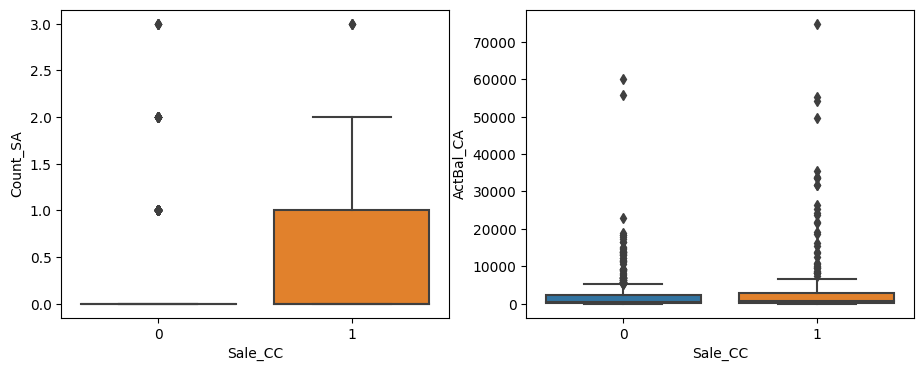

In [60]:
fig, axes = plt.subplots(1,2, figsize=(11,4))
sns.boxplot(x = 'Sale_CC', y = 'Count_SA', data = df_merged, ax=axes[0])
sns.boxplot(x = 'Sale_CC', y = 'ActBal_CA', data = df_merged, ax=axes[1])

clients that are going to be targeted with consumer loan offer are those who are relatively younger and have longer tenure.

<Axes: xlabel='Sale_CL', ylabel='Tenure'>

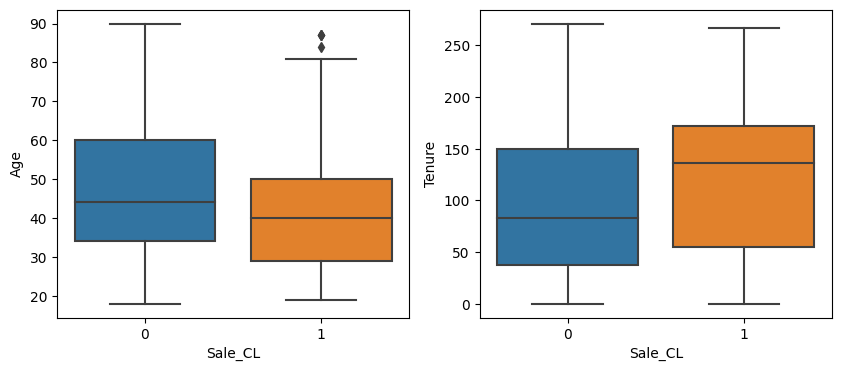

In [410]:

fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.boxplot(x = 'Sale_CL', y = 'Age', data = df_merged, ax=axes[0])
sns.boxplot(x = 'Sale_CL', y = 'Tenure', data = df_merged, ax=axes[1])

clients that are going to be targeted with mutual fund offer are those who have more transaction debt and transaction debt for current account and those relatively young.

<Axes: xlabel='Sale_MF', ylabel='Age'>

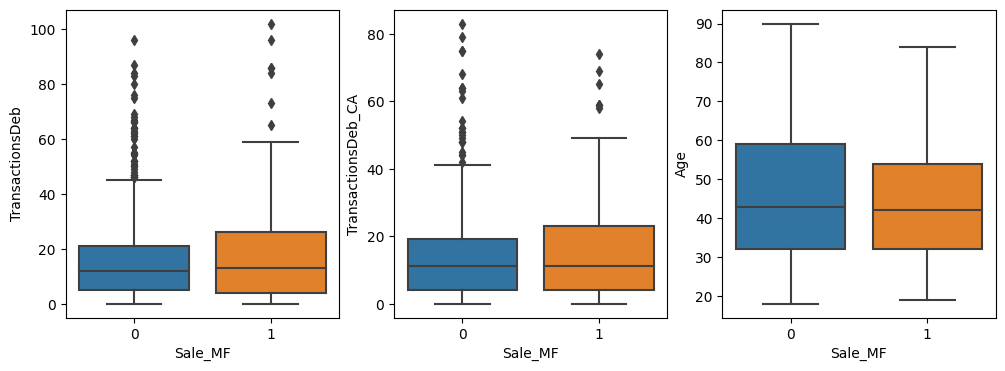

In [61]:
fig, axes = plt.subplots(1,3, figsize=(12,4))
sns.boxplot(x = 'Sale_MF', y = 'TransactionsDeb', data = df_merged, ax=axes[0])
sns.boxplot(x = 'Sale_MF', y = 'TransactionsDeb_CA', data = df_merged, ax=axes[1])
sns.boxplot(x = 'Sale_MF', y = 'Age', data = df_merged, ax=axes[2])